# HW4

## Question 1: Cancer diagnosis using Machine Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### a. Read the dataset file “Cancer.csv” (you should download it from CSNS), and store it in a Pandas DataFrame. Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign tumor). You will use all 9 features in this homework.

In [2]:
data = pd.read_csv("Cancer.csv")
X = data[['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
y = data['Malignant_Cancer']
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


### b. Use sklearn functions (see class tutorials for details) to split the dataset into testing and training sets with the following parameters: `test_size=0.3`, `random_state=2`.

In [3]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_Train.shape

(105, 9)

### c. Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy of your classifier. Use this command to define your tree:
`my_DecisionTree = DecisionTreeClassifier(random_state=2)`.

In [4]:
my_DecisionTree = DecisionTreeClassifier(random_state = 2)
my_DecisionTree.fit(X_Train, y_Train)
accuracy = my_DecisionTree.score(X_Test, y_Test)
print("Accuracy: ", accuracy)

Accuracy:  0.866666666667


### d. Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy of your classifier. Use this command to import and define your classifier:

`from sklearn.ensemble import RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)`
#### Similar to previous syntax, use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict for prediction.

In [5]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)
my_RandomForest.fit(X_Train, y_Train)
accuracy = my_RandomForest.score(X_Test, y_Test)
print("Accuracy: ", accuracy)

Accuracy:  0.955555555556


## Question 2: Predict the probability of Heart Disease

### a. In this question, we work with a simplified version of Heart dataset (remember that this dataset is a little different from what you have used in HW2). Read the dataset file “Hearts_short.csv” (you should download it from CSNS), and assign it to a Pandas DataFrame.

In [6]:
hearts_short = pd.read_csv("Heart_short.csv")
hearts_short.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


### b. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [7]:
names = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
features = hearts_short[names]
print(features.head(), "\n") # print original data

#i think this is how you normalize it?
scaler = MinMaxScaler()
transformed = scaler.fit_transform(features)

X = pd.DataFrame(transformed)
X.columns = names
print(X.head(), "\n") # print normalized version

print(hearts_short[["AHD"]].head(),"\n") # print labels before conversion
hearts_short[["AHD"]] = np.where(hearts_short["AHD"] == "Yes", 1, 0) # if error, run part A again

y = hearts_short["AHD"]
print(y.head())

   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4 

        Age    RestBP      Chol  RestECG     MaxHR   Oldpeak
0  0.708333  0.481132  0.244292      1.0  0.603053  0.370968
1  0.791667  0.622642  0.365297      1.0  0.282443  0.241935
2  0.791667  0.245283  0.235160      1.0  0.442748  0.419355
3  0.166667  0.339623  0.283105      0.0  0.885496  0.564516
4  0.250000  0.339623  0.178082      1.0  0.770992  0.225806 

   AHD
0   No
1  Yes
2  Yes
3   No
4   No 

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64


### c. Split the dataset into testing and training sets with the following parameters: `test_size=0.2`, `random_state=3`.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
'''
print(y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''

'\nprint(y_train)\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\n'

### d. Use Logistic Regression Classifier to *predict* Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the *Accuracy*.

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train) # train classifier

y_predict_lr = log_reg.predict(X_test)
print(y_predict_lr)

score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)

[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]
0.719298245614


### Now, Use Logistic Regression Classifier to *predict the probability* of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.*predict_proba*” method rather than “my_logreg.predict”). Then, Plot the *Roc Curve* for this classifier, and also Compute the *AUC* (Area Under Curve for ROC).

In [10]:
y_predict = log_reg.predict(X_test)
y_predict_prob = log_reg.predict_proba(X_test)

print(y_predict.shape)
print(y_predict_prob.shape, "\n")

false_pr, true_pr, thresholds = metrics.roc_curve(y_test, y_predict_lr, pos_label = 1)

print("False positive:\n", false_pr, "\n")
print("True positive:\n", true_pr)

(57,)
(57, 2) 

False positive:
 [ 0.          0.16666667  1.        ] 

True positive:
 [ 0.          0.59259259  1.        ]


In [11]:
AUC = metrics.auc(false_pr, true_pr)
print(AUC)

0.712962962963


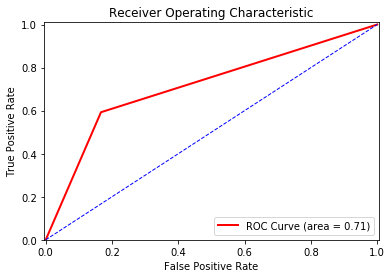

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(false_pr, true_pr, color="red", lw = 2, label= "ROC Curve (area = %0.2f)" % AUC)

plt.plot([0, 1], [0, 1], color="blue", lw = 1, linestyle = "--")

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

plt.show()

